In [6]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot= True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
nb_classes = 10

In [8]:
# MNIST data image of shape 28 * 28 = 784
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, nb_classes])

In [9]:
W = tf.Variable(tf.random_normal([784, nb_classes]), name= 'weight')
b = tf.Variable(tf.random_normal([nb_classes]), name= 'bias')

In [10]:
# Hypothesis (using softmax)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

In [12]:
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis= 1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate= 0.1).minimize(cost)

In [13]:
# Test model
is_correct = tf.equal(tf.math.argmax(hypothesis, 1), tf.math.argmax(Y, 1))

In [15]:
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

one epoch = one forward pass and one backward pass of all the training example 

batch size = the number of training examples in one forward/backward pass.  
The higher the batch size, the more memory sapce you'll need.  

number of iterations = number of passes, each pass using[batch size] number of  examples.  
To be clear, one pass = one forward pass + one backward pass  
(we do not count the forward pass and backward pass as to different passes.)


Example.  
If you have 1000 training example, and your batch size is 500,  
then it will take 2 iterations to complete 1 epoch.

Epoch :    1 cost =  2.941280
Epoch :    2 cost =  1.069466
Epoch :    3 cost =  0.858242
Epoch :    4 cost =  0.753140
Epoch :    5 cost =  0.686096
Epoch :    6 cost =  0.637463
Epoch :    7 cost =  0.600708
Epoch :    8 cost =  0.571199
Epoch :    9 cost =  0.547736
Epoch :   10 cost =  0.527445
Epoch :   11 cost =  0.511074
Epoch :   12 cost =  0.496147
Epoch :   13 cost =  0.483557
Epoch :   14 cost =  0.472118
Epoch :   15 cost =  0.462490
Accuracy: 0.8891
Label:  [3]
Prediction:  [3]


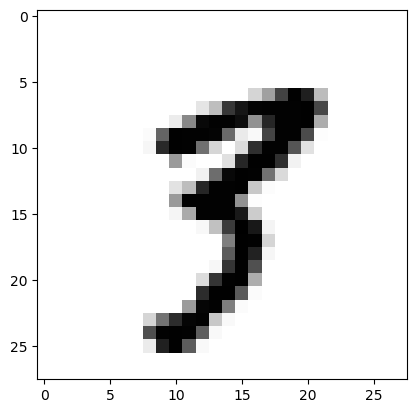

In [22]:
#parameters
training_epochs = 15
batch_size = 100

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / batch_size)
        
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            c, _ = sess.run([cost, optimizer], feed_dict= {X: batch_xs,
                                                           Y: batch_ys})
            avg_cost += c / total_batch
            
        print('Epoch :', '{:4d}'.format(epoch + 1), 'cost =', '{:9f}'.format(avg_cost))
    # Test the model using test sets
    print('Accuracy:', accuracy.eval(session= sess, feed_dict={X: mnist.test.images,
                                                               Y: mnist.test.labels}))
    
    # Get one and predict
    r = random.randint(0, mnist.test.num_examples - 1)
    print("Label: ", sess.run(tf.argmax(mnist.test.labels[r : r + 1], 1)))
    print(
        "Prediction: ",
        sess.run(tf.argmax(hypothesis, 1), feed_dict={X: mnist.test.images[r : r + 1]}),
    )

    plt.imshow(
        mnist.test.images[r : r + 1].reshape(28, 28),
        cmap="Greys",
        interpolation="nearest",
    )
    plt.show()

In [19]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [20]:
plt.style.use('default')